In [1]:
def func_python(N):
    d = 0.0
    for i in range(N):
        d += (i % 3 -1) * i
    return d


In [17]:
func_python(10)

-3.0

In [18]:
y = (10 % 3 - 1) * 3
y

0

In [20]:
%timeit func_python(1000)

251 µs ± 5.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
import numpy as np
a = list(range(10000))
A = np.array(a)
b = A + 5
print(b)

[    5     6     7 ... 10002 10003 10004]


In [32]:
b = [val + 5 for val in a]
print(b)

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,

# NumPy aggregations are much faster than Python built ins
## Below we'll compare Python built in vs Numpy array

In [33]:
from random import random
c = [random() for i in range(100000)]
%timeit min(c)

2.37 ms ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [34]:
c = np.array(c)

%timeit c.min()

74.1 µs ± 226 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [40]:
M = np.random.randint(0,10, (3,5))
M

array([[4, 9, 6, 0, 9],
       [2, 5, 2, 8, 5],
       [4, 1, 5, 2, 3]])

In [43]:
M.sum(axis = 1) #Sum of all the elements in every row

array([28, 22, 15])

In [44]:
M.sum(axis = 0) #Sum of all the elements in every column 

array([10, 15, 13, 10, 17])

# Numpy's Broadcasting
## Broadcating is a set of rules by which ufuncs operate on arrays of different sizes and/or dimensions

## Broadcating rules ...

* If array shapes differ, left-pad the smaller shape with 1s
* If any dimension does not match, broadcast with size=1
* If neither non-matching dimension is 1, raise and error

## Numpy's Slicing, Masking, and fancy indexing

In [45]:
l = [2,3,5,7,11]
l[0] # Integer index

2

In [46]:
l[1:3]

[3, 5]

In [47]:
L= np.array(l)
L[0]

2

In [50]:
L[1:3]

array([3, 5])

In [53]:
#Masking: indexing with boolean masks
mask = np.array([False, True, True, False, True]) 
#mask is a boolean array
L[mask]

array([ 3,  5, 11])

In [56]:
#Masks are often constructed using comparison operators and boolean logic, e.g.
mask = (L<4) | (L>8) #"|" = "bitwise OR
L[mask]

array([ 2,  3, 11])

#### Multiple Dimensions: 
#### Use commas to separate Indices!

In [84]:
M = np.arange(0,120,3).reshape(5,8)
M

array([[  0,   3,   6,   9,  12,  15,  18,  21],
       [ 24,  27,  30,  33,  36,  39,  42,  45],
       [ 48,  51,  54,  57,  60,  63,  66,  69],
       [ 72,  75,  78,  81,  84,  87,  90,  93],
       [ 96,  99, 102, 105, 108, 111, 114, 117]])

In [71]:
M[0,1] #multiple indices separated by comma

3

In [72]:
print(M[:,3]) #mixing slices ":" and Indicies
M[1:5, 2:5]

[  9  33  57  81 105]


array([[ 30,  33,  36],
       [ 54,  57,  60],
       [ 78,  81,  84],
       [102, 105, 108]])

In [74]:
#Masking with full array
M[abs(M-3)<20]

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [75]:
#Mixing fancy indexing and slicing
M[[1,0], :2]

array([[24, 27],
       [ 0,  3]])

In [80]:
#Mixing masking and slicing
M[M.sum(axis =1) >50, 1:]

array([[  3,   6,   9,  12,  15,  18,  21],
       [ 27,  30,  33,  36,  39,  42,  45],
       [ 51,  54,  57,  60,  63,  66,  69],
       [ 75,  78,  81,  84,  87,  90,  93],
       [ 99, 102, 105, 108, 111, 114, 117]])

#### All of these operations can be composed and combined in nearly limitless ways!

In [110]:
M.reshape(5,8)

array([[  0,   3,   6,   9,  12,  15,  18,  21],
       [ 24,  27,  30,  33,  36,  39,  42,  45],
       [ 48,  51,  54,  57,  60,  63,  66,  69],
       [ 72,  75,  78,  81,  84,  87,  90,  93],
       [ 96,  99, 102, 105, 108, 111, 114, 117]])

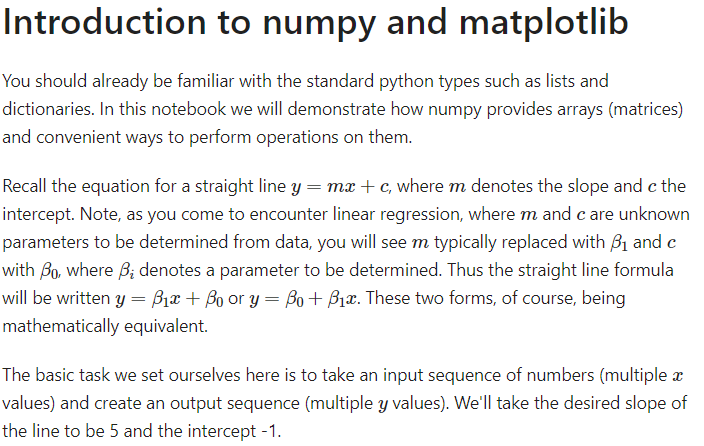

In [113]:
m =5 
c =-1
x = list(range (7))
x

[0, 1, 2, 3, 4, 5, 6]

In [114]:
# task: use a list comprehension to create the output y values
# note how we can't simply write y = m*x + c
# one line of code here:
y = [m*x_i + c for x_i in x]
print(y)

[-1, 4, 9, 14, 19, 24, 29]


Although list comprehensions are very "pythonic", they are more cumbersome than we'd like for performing lots of numeric, or matrix, operations.

### Numpy
* Let's now perform the above using numpy

In [117]:
import numpy as np
X = np.array(x)
Y = m*X + c
Y

array([-1,  4,  9, 14, 19, 24, 29])

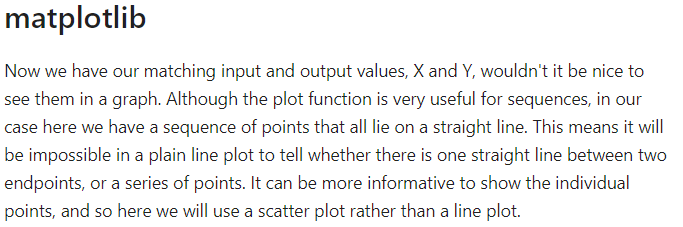

In [118]:
import matplotlib.pyplot as plt

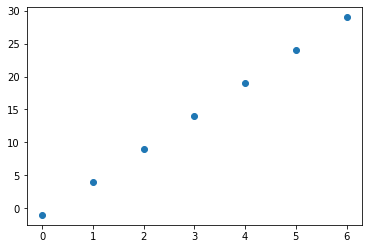

In [119]:
# task: create a scatter plot of X and Y
# Hint: either refer to matplotlib documentation or, after importing pyplot, use Jupyter's autocompletion
# suggestions to find the relevant scatter plot function
# one line of code here:
plt.scatter(X,Y)

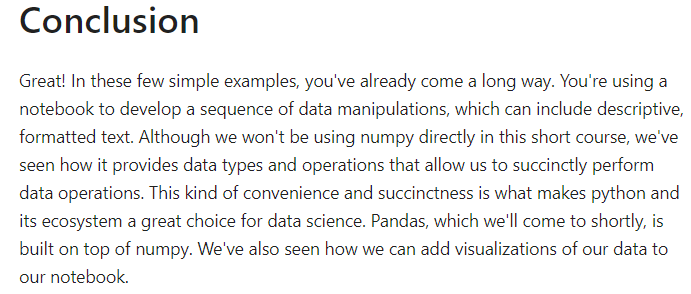